<div style="background-color: #ffffff ; padding: 10px;">

**Goals**:
1. Scrape text from an HTML webpage.
2. Export the text to a Microsoft Word document.
3. Format elements on document.

**Data:** https://www.treasurydirect.gov/about/

**Skills**: web scraping, exporting text as Word doc

**Technology**: Python, Requests, BeautifulSoup, python-docx

**Result**: [About — TreasuryDirect.docx](./About%20—%20TreasuryDirect.docx)
</div>

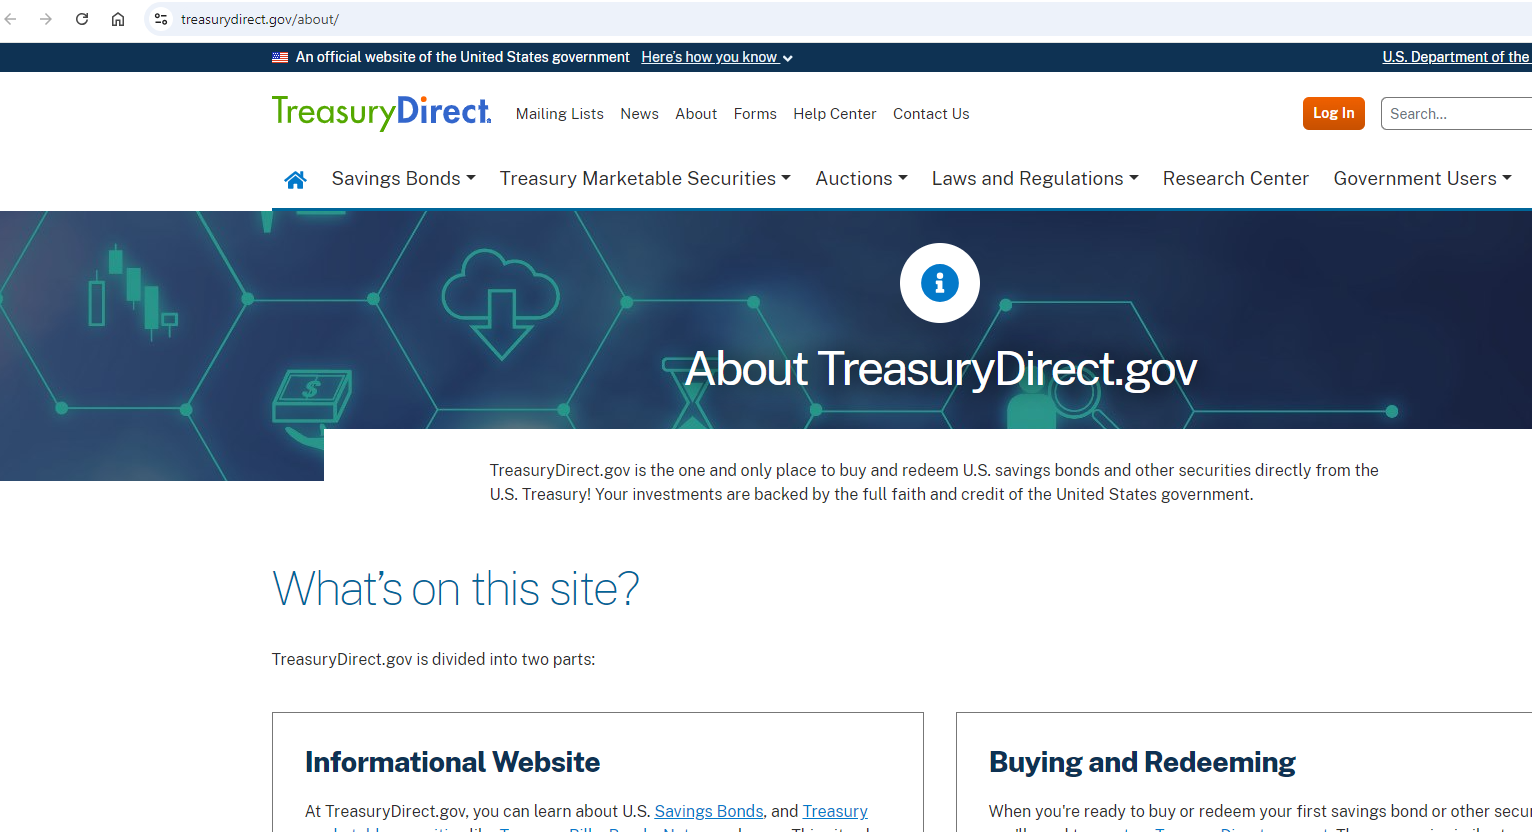

In [109]:
# imports
import requests
from bs4 import BeautifulSoup

import os
from docx import Document

web scrape

In [114]:
# scrape HTML from webpage

# define webpage
url = "https://www.treasurydirect.gov/about/"

# get request
response = requests.get(url)

# verify get (Response [200])
#print(response)

# parse html with BeautifulSoup
# also possible with XML: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#for-xml-documents
soup = BeautifulSoup(response.content, "html.parser")

html review

In [115]:
# preview elements and classes
pretty_html = soup.prettify()

print(pretty_html)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="initial-scale=1" name="viewport"/>
  <title>
   About — TreasuryDirect
  </title>
  <link href="/styles/style.css" rel="stylesheet" type="text/css"/>
  <link href="/images/favicon.svg" rel="icon" type="image/svg+xml"/>
  <style>
   .scrollButton:hover{
        background-color: #0379ca;
        opacity: 100% !important;
      }
  </style>
 </head>
 <body>
  <div class="container">
   <a class="sr-only sr-only-focusable" href="#main">
    Skip Navigation
   </a>
  </div>
  <div class="text-white bg-usa-blue-dark" role="banner">
   <div class="container-xxl">
    <div class="row">
     <div class="col-md py-1 media small">
      <img alt="U.S. flag" class="align-self-center mr-2" src="/images/icons/us_flag_small.png"/>
      <div class="media-body">
       <span class="mr-2">
        An official website of the United States government
       </span>
       <a aria-controls="official-site-collapse" aria-ex

document assembly

In [129]:
# establish blank document
doc = Document()

# add title
title = soup.find("title").get_text(strip=True)
doc.add_heading(title, level=0)

# add URL
doc.add_heading(url, level=1)

# select elements for document
elements = soup.find_all(["h3", "p"])

# loop through elements and add to doc with formatting
for element in elements:
    # generic placeholder for any element/class in loop
    text = element.get_text(strip=True)
    if element.name == "h3":
        doc.add_heading(text, level=2)
    else:
        doc.add_paragraph(text)


saving document as .docx

In [128]:
# create file path
file_path = f"{title}.docx"

# delete existing Word doc (or else it will add to doc!)
if os.path.exists(file_path):
    os.remove(file_path)

# save as Word doc
doc.save(file_path)

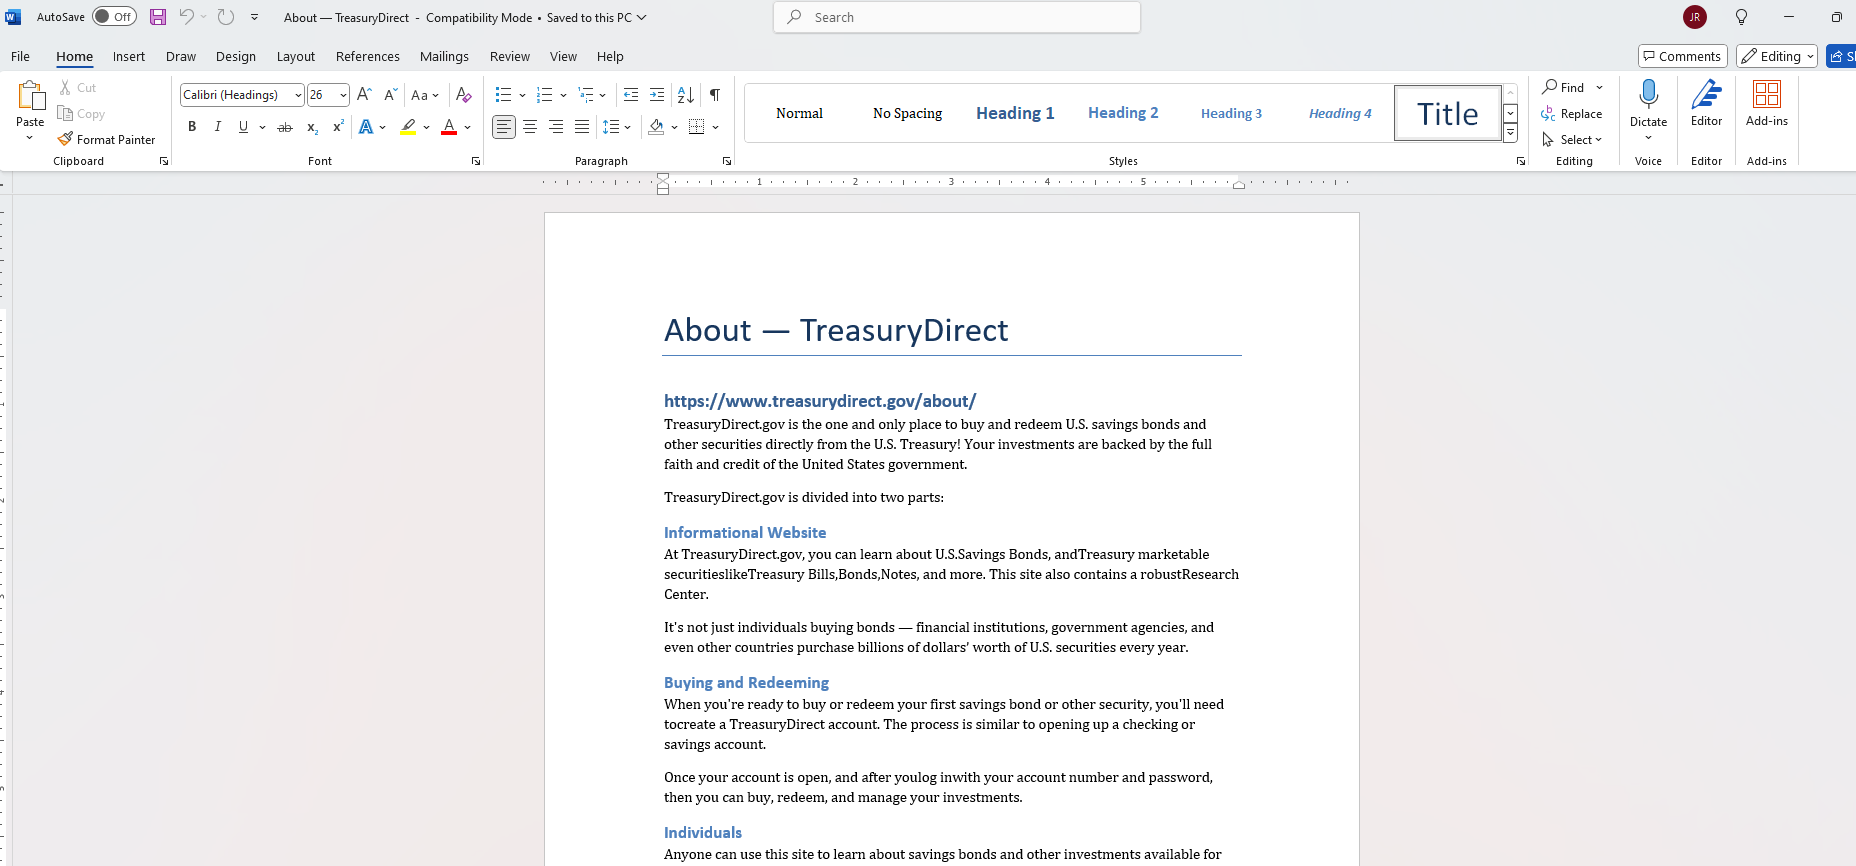